In [1]:
import os
import random

import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
import kmeans
import kmeansGPU
import cupy as cp
import cv2 as cv
plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams.update({'font.size': 20})
np.set_printoptions(suppress=True, precision=5)
import pandas as pd
import time

In [2]:
def flatten(img):
    '''Flattens `img` to N 1D vectors.
    For example, for an RGB image, `(num_rows, num_cols, rgb)` -> `(num_rows*num_cols, rgb)`.

    Parameters:
    -----------
    img: ndarray. shape=(num_rows, num_cols, rgb)

    Returns:
    -----------
    Flattened `img`. ndarray. shape=(num_rows*num_cols, rgb)
    '''
    flatten_img = img.reshape(img.shape[0] * img.shape[1], img.shape[2])
    return flatten_img


In [3]:
intense_m29_img = plt.imread('https://p.vitalmtb.com/photos/products/28620/photos/54903/s1600_photo_734056.jpg?1578283962', 'jpg')
flatten_intense_m29 = flatten(intense_m29_img)
m29_cluster_gpu = kmeansGPU.KMeansGPU(flatten_intense_m29)
m29_cluster = kmeansGPU.KMeansGPU(flatten_intense_m29, use_gpu=False)


blue_bird_img = plt.imread('data/baby_bird.jpeg')
blue_bird_flattened = flatten(blue_bird_img)
blue_bird_cluster_gpu = kmeansGPU.KMeansGPU(blue_bird_flattened)
blue_bird_cluster = kmeansGPU.KMeansGPU(blue_bird_flattened, use_gpu=False)



five_blobs = pd.read_csv('data/five_blobs.csv')
five_blobs_cluster_gpu = kmeansGPU.KMeansGPU(five_blobs.values)
five_blobs_cluster = kmeansGPU.KMeansGPU(five_blobs.values, use_gpu=False)



Testing GPU vs CPU run times and other methods such as L1 vs L2 norm

11.4 s ± 68.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


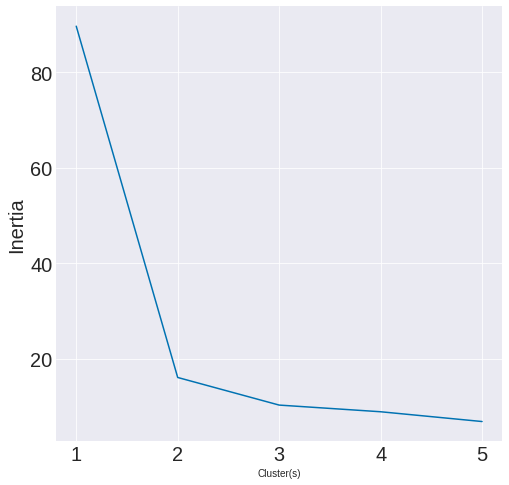

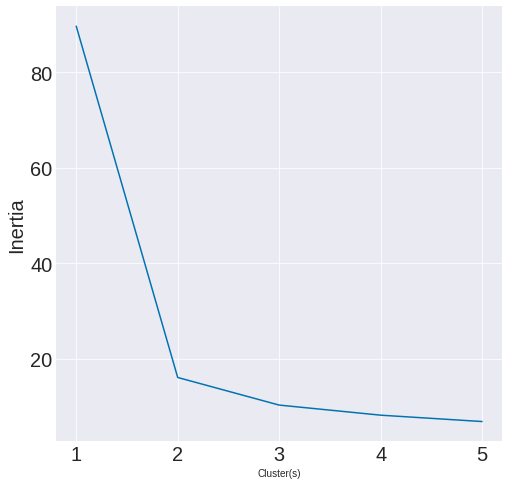

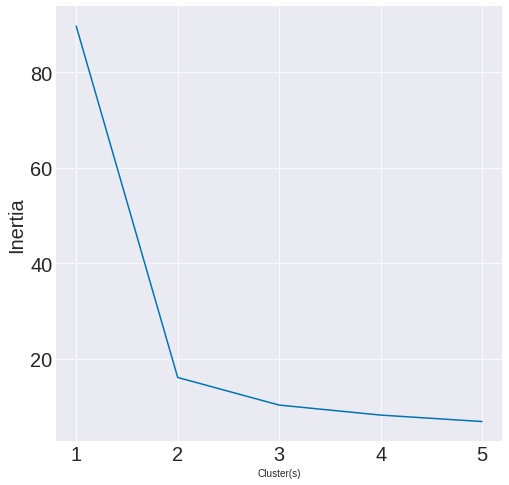

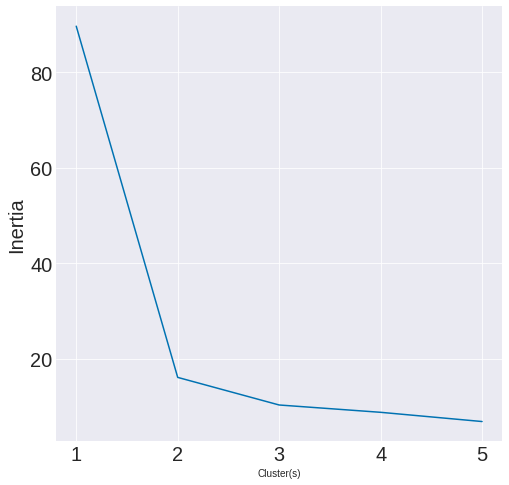

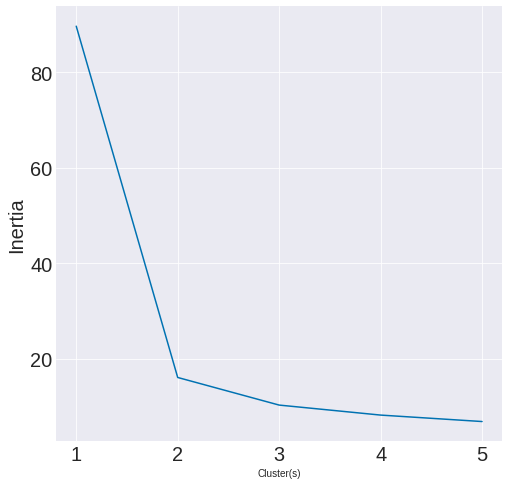

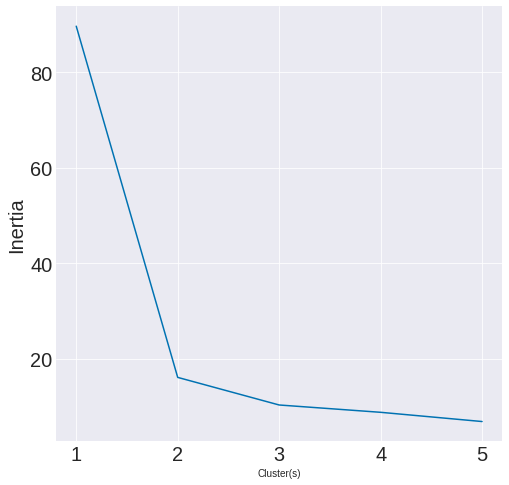

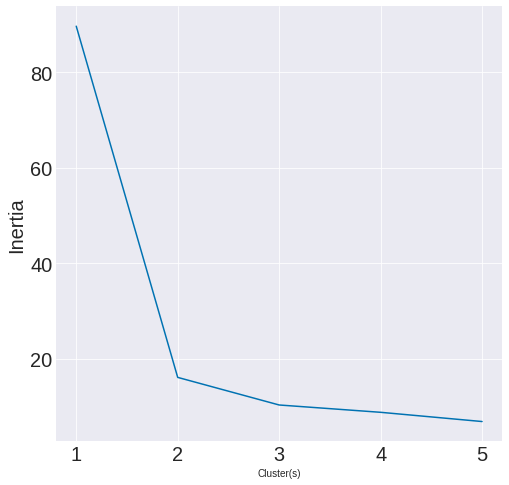

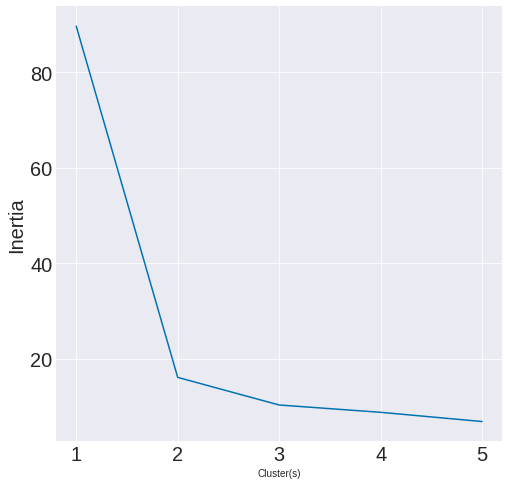

In [7]:
#L2 GPU m29 bike
%timeit m29_cluster_gpu.elbow_plot(max_k =  5, cluster_method = 'batch',init_method = 'points',batch_iters = 4, max_iter = 100)



KeyboardInterrupt: 

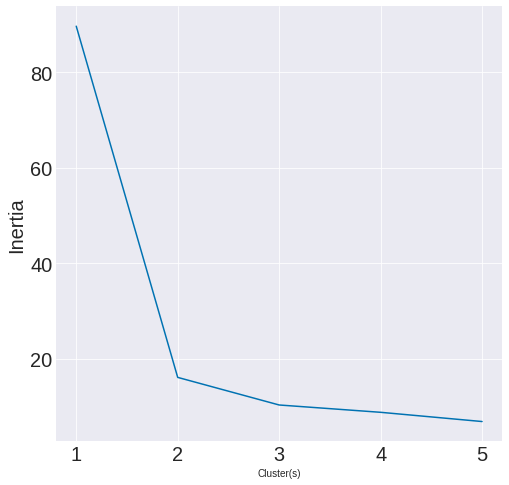

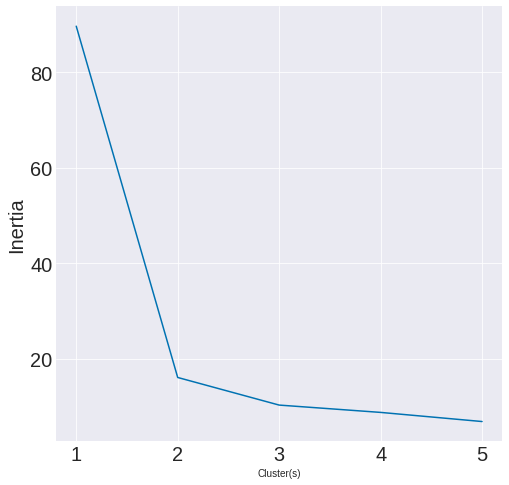

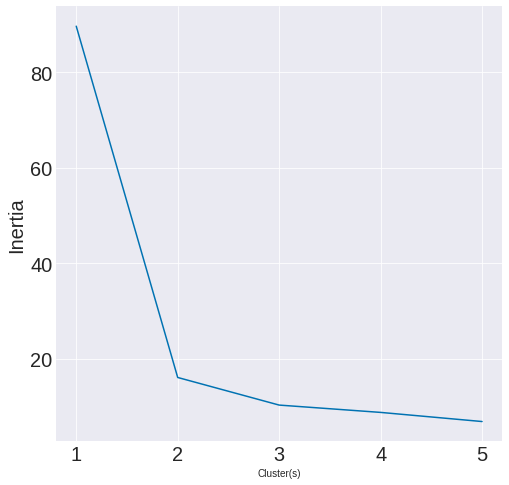

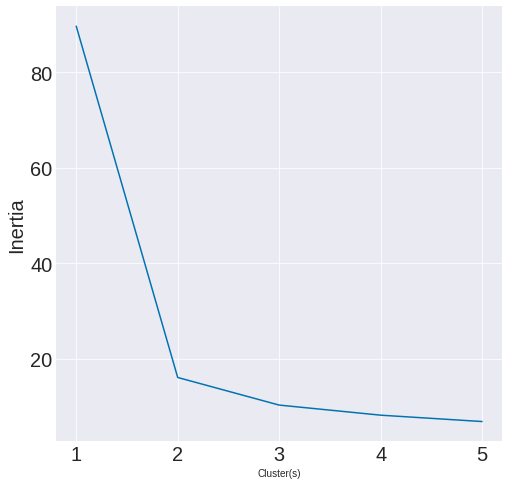

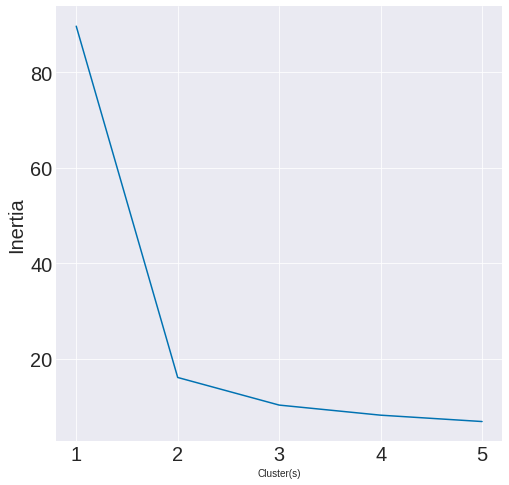

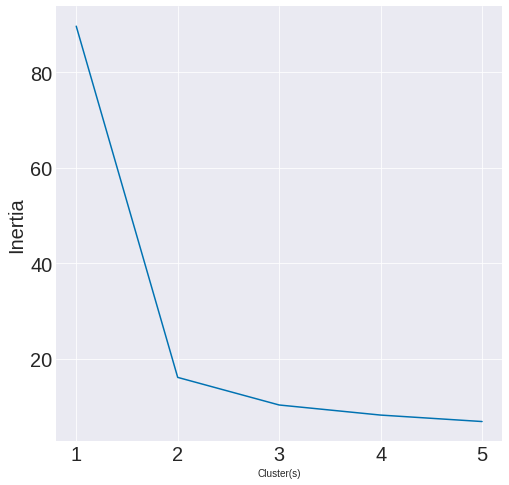

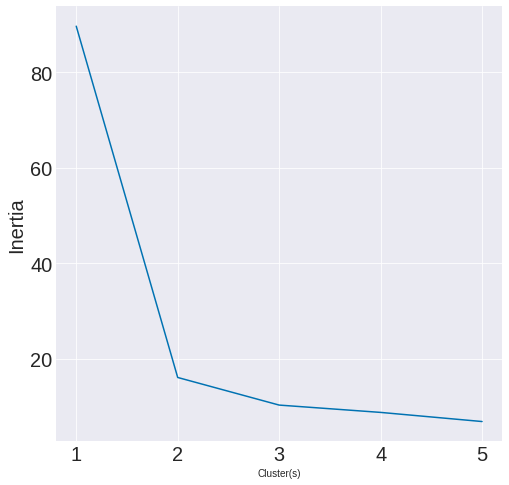

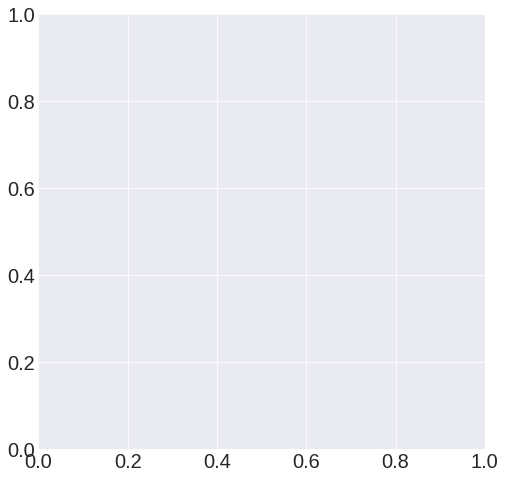

In [8]:
#L2 CPU m29 bike
%timeit m29_cluster.elbow_plot(max_k = 5, cluster_method = 'batch',init_method = 'points',batch_iters = 4, max_iter = 100)


In [ ]:
#L2 CPU cpu m29 bike
%timeit m29_cluster.elbow_plot(max_k = 15, cluster_method = 'batch',init_method = '++',batch_iters = 2, max_iter = 50)


In [ ]:
m29_cluster_gpu.elbow_plot(max_k = 50, cluster_method = 'batch')
plt.show()


In [ ]:
m29_cluster.elbow_plot(max_k = 50, cluster_method = 'batch')
plt.show()





In [5]:
#L2 GPU m29 bike
%timeit m29_cluster_gpu.cluster_batch(16,3)

2.81 s ± 221 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [6]:
#L2 CPU cpu m29 bike
%timeit m29_cluster.cluster_batch(16,3)


30.7 s ± 5.63 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [4]:
#L2 GPU m29 bike Kmeans++
%timeit m29_cluster_gpu.cluster_batch(16,3,init_method = '++')


2.59 s ± 200 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
